In [1]:
from pyopenms import *
import matplotlib.pyplot as plt

In [2]:
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("Fusion_180220_16.mzML", "Scerevisiae_UPS2_1802.fasta", protein_ids, peptide_ids)
exp = MSExperiment()
MzMLFile().load("Fusion_180220_16.mzML", exp)
filtered = MSExperiment()
for s in exp:
    if s.getMSLevel() == 2:
        filtered.addSpectrum(s)

In [3]:
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
            obs_int = [element / max(obs_int) for element in obs_int] 
            theo_int = [element * -1 for element in theo_int] 
            plt.figure(figsize=(12,8))
            plt.bar(obs_mz, obs_int, width = 3.0)
            plt.bar(theo_mz, theo_int, width = 3.0)
            plt.title(title)
            plt.ylabel('intensity')
            plt.xlabel('m/z')

In [4]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for peptide_id in peptide_ids[0:100]:
    print (35*"=")
    print ("Peptide ID m/z:", peptide_id.getMZ()) 
    for hit in peptide_id.getHits():
        print(" - Peptide hit rank:", hit.getRank())
        print(" - Peptide hit sequence:", hit.getSequence())  
        spectra = filtered.getSpectrum(peptide_id.getMetaValue("scan_index"))
        tsg = TheoreticalSpectrumGenerator()
        thspec = MSSpectrum()
        p = Param()
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        peptide = AASequence.fromString(hit.getSequence().toString())
        tsg.getSpectrum(thspec, peptide, 1, 2)
        
        alignment = []
        spa = SpectrumAlignment()
        p = spa.getParameters()
        
        p.setValue("tolerance", 0.5)
        p.setValue("is_relative_tolerance", "false")
        spa.setParameters(p)

        spa.getSpectrumAlignment(alignment, thspec, spectra)

        print("Number of matched peaks: " + str(len(alignment)))
        print("ion\ttheo. m/z\tobserved m/z")
        for theo_idx, obs_idx in alignment:
            ion_name = thspec.getStringDataArrays()[0][theo_idx].decode()
            ion_charge = thspec.getIntegerDataArrays()[0][theo_idx]
            print(ion_name + "\t" + str(ion_charge) + "\t"
                  + str(thspec[theo_idx].getMZ())
                  + "\t" + str(spectra[obs_idx].getMZ()))

        
        for theo_idx, obs_idx in alignment:
            theo_mz.append(thspec[theo_idx].getMZ())
            theo_int.append(thspec[theo_idx].getIntensity())
            obs_mz.append(spectra[obs_idx].getMZ())
            obs_int.append(spectra[obs_idx].getIntensity())

Peptide ID m/z: 673.808166503906
 - Peptide hit rank: 1
 - Peptide hit sequence: M(Oxidation)M(Oxidation)YPFLDPATK
Number of matched peaks: 10
ion	theo. m/z	observed m/z
y6++	2	322.684323748321	323.17376708984375
b5++	2	351.634930382621	351.4603271484375
y7++	2	396.218530891871	396.0791015625
y4+	1	416.250362519471	416.1710205078125
b8++	2	514.216816749471	514.36767578125
y9++	2	526.276577647071	526.258544921875
y10++	2	599.7942776556209	599.2948608398438
b10++	2	600.2592134408711	600.01318359375
y6+	1	644.361371029871	644.7133178710938
b10+	1	1199.511150414971	1199.5179443359375
Peptide ID m/z: 717.776306152344
 - Peptide hit rank: 1
 - Peptide hit sequence: EEDNDDDAGAVPTS
Number of matched peaks: 7
ion	theo. m/z	observed m/z
y7+	1	602.3144208384709	602.1343994140625
b5+	1	603.189281423771	602.83447265625
b12++	2	614.7336585673211	614.8358764648438
y13++	2	653.257498178971	653.2831420898438
b13++	2	665.2574981789711	664.9039916992188
y8+	1	717.3413649979709	717.5526733398438
b11+	1	11

b9+	1	941.3417768555711	941.5042724609375
b10+	1	998.3632409512711	998.2640991210938
b11+	1	1055.384705046971	1055.4281005859375
Peptide ID m/z: 698.255676269531
 - Peptide hit rank: 1
 - Peptide hit sequence: VDDDEDEDNSDK
Number of matched peaks: 8
ion	theo. m/z	observed m/z
b4++	2	223.081899849571	223.1383514404297
b4+	1	445.15652323237094	444.9097900390625
b9++	2	524.1729023280709	524.6478271484375
y10++	2	591.207473987571	591.2752685546875
b11++	2	625.202388987571	625.057861328125
y11++	2	648.720946067321	648.6119384765625
y10+	1	1181.407671508371	1181.41455078125
b11+	1	1249.397501508371	1249.4818115234375
Peptide ID m/z: 689.354614257813
 - Peptide hit rank: 1
 - Peptide hit sequence: FWPLEDVLTEK
Number of matched peaks: 5
ion	theo. m/z	observed m/z
b3+	1	431.207768296171	431.14874267578125
y5+	1	589.355556997971	589.7222900390625
y10++	2	615.3242568703711	614.8399658203125
b5+	1	673.3344268703711	673.339599609375
y6+	1	704.382501157471	704.35498046875
Peptide ID m/z: 641.2968139

 - Peptide hit sequence: DIQVAATHVR
Number of matched peaks: 8
ion	theo. m/z	observed m/z
b3+	1	357.17686323237103	357.37109375
b8++	2	418.71668687592097	418.93035888671875
b4+	1	456.245277519471	456.24493408203125
b9++	2	468.250894019471	467.96722412109375
y9++	2	497.793260163021	497.86236572265625
y4+	1	512.293958647071	512.4971313476562
b5+	1	527.282391678971	526.9556884765625
b9+	1	935.494511572171	935.9136352539062
Peptide ID m/z: 631.814147949219
 - Peptide hit rank: 1
 - Peptide hit sequence: NLFNNEDIQR
Number of matched peaks: 8
ion	theo. m/z	observed m/z
y4++	2	266.147908072871	266.1942138671875
b6++	2	366.66920518452105	366.42510986328125
y8++	2	518.2463405194711	518.2304077148438
y4+	1	531.288539678971	531.59228515625
b9++	2	544.7539985673211	545.110107421875
y9++	2	574.7883726949211	574.9017333984375
b5+	1	603.288539678971	603.0108642578125
y9+	1	1148.569468923071	1148.579345703125
Peptide ID m/z: 542.322875976563
 - Peptide hit rank: 1
 - Peptide hit sequence: IYSFSLKPK
Nu

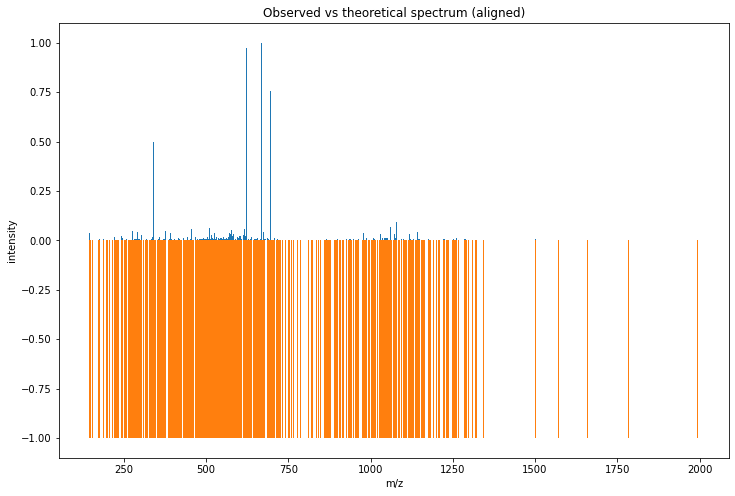

In [5]:
title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)